In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

warnings.filterwarnings("ignore")
%matplotlib inline

vote_df = pd.read_csv('./train.csv')
vote_df.head(3)

,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,...,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
0,43375,1.0,324,5.0,1067,5.0,359,1.0,709,1.0,...,1,1,1,1,1,0,1,0,1,1
1,4486,1.0,534,5.0,1555,5.0,2024,1.0,1097,1.0,...,1,1,1,1,1,0,1,0,1,1
2,10262,5.0,609,1.0,749,2.0,624,1.0,1833,3.0,...,1,1,0,1,1,0,1,0,1,0


In [2]:
# 결손값 확인
print('\n \\\ train 데이터 정보 \\\ \n')
print(vote_df.info())
print(vote_df.shape)


 \\ train 데이터 정보 \\ 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36425 entries, 0 to 36424
Data columns (total 78 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       36425 non-null  int64  
 1   QaA         36425 non-null  float64
 2   QaE         36425 non-null  int64  
 3   QbA         36425 non-null  float64
 4   QbE         36425 non-null  int64  
 5   QcA         36425 non-null  float64
 6   QcE         36425 non-null  int64  
 7   QdA         36425 non-null  float64
 8   QdE         36425 non-null  int64  
 9   QeA         36425 non-null  float64
 10  QeE         36425 non-null  int64  
 11  QfA         36425 non-null  float64
 12  QfE         36425 non-null  int64  
 13  QgA         36425 non-null  float64
 14  QgE         36425 non-null  int64  
 15  QhA         36425 non-null  float64
 16  QhE         36425 non-null  int64  
 17  QiA         36425 non-null  float64
 18  QiE         36425 non-null  int64  
 19  Qj

In [3]:
def voted_prob(df=None, column=None):
    voted_people = df[df['voted']==1]
    uniques = df[column].unique()
    
    # 투표한 사람들 중 unique의 비율 (e.g. 투표한 사람들 중 남자의 비율)
    for unique in uniques:
        prob = round( len(voted_people[voted_people[column]==unique])/len(voted_people), 4)
        print("투표한 사람들 중", unique, "비율:", prob)
    print("")
    
    # column 속에서 unique마다의 비율 (e.g. gender 컬럼에서 남자의 비율)
    for unique in uniques:
        prob = round(len(df[df[column]==unique])/len(vote_df), 4)
        print(column, "컬럼 중", unique, "의 비율:",prob)
    print("")
    
    # unique 중에서 투표를 한 비율 (e.g.남자 중에서 투표를 한 비율)
    for unique in uniques:
        prob = round( len(voted_people[voted_people[column]==unique])/len(df[df[column]==unique]), 4)
        print(unique, "중 투표를 한 비율: ", prob)

1. education 컬럼 전처리 

In [4]:
# education 컬럼
vote_df['education'].value_counts()

2    13401
3    12263
4     6300
1     4029
0      432
Name: education, dtype: int64

투표한 사람들 중 3 비율: 0.445
투표한 사람들 중 2 비율: 0.296
투표한 사람들 중 1 비율: 0.0119
투표한 사람들 중 4 비율: 0.2349
투표한 사람들 중 0 비율: 0.0122

education 컬럼 중 3 의 비율: 0.3367
education 컬럼 중 2 의 비율: 0.3679
education 컬럼 중 1 의 비율: 0.1106
education 컬럼 중 4 의 비율: 0.173
education 컬럼 중 0 의 비율: 0.0119

3 중 투표를 한 비율:  0.599
2 중 투표를 한 비율:  0.3646
1 중 투표를 한 비율:  0.0489
4 중 투표를 한 비율:  0.6154
0 중 투표를 한 비율:  0.4676


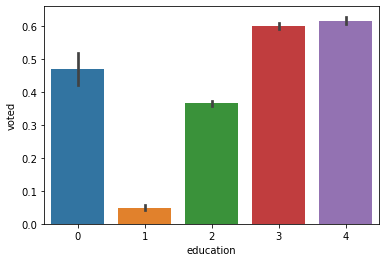

In [5]:
sns.barplot(x='education', y='voted', data=vote_df)

voted_prob(df=vote_df, column='education')

In [6]:
# education 0칼럼 삭제(0.0119)-----비율??
edu_index = vote_df[vote_df['education'] == 0].index
edu_df = vote_df.drop(edu_index)
edu_df.shape

(35993, 78)

In [7]:
# 0칼럼이 정상적으로 삭제되었는지 확인 (1칼럼 삭제..?)
edu_df['education'].value_counts()

2    13401
3    12263
4     6300
1     4029
Name: education, dtype: int64

In [8]:
# 레이블 인코딩이 이미 되어있으므로 진행하지 않음
# engnat행 원핫 인코딩 진행
pd.get_dummies(edu_df['education'])

,1,2,3,4
0,0,0,1,0
1,0,1,0,0
2,0,1,0,0
3,0,0,1,0
4,0,1,0,0
...,...,...,...,...
36420,0,1,0,0
36421,1,0,0,0
36422,0,0,0,1
36423,0,0,0,1


2. engnat 컬럼 전처리 (고려를 안할 수도 있음....!!

In [9]:
vote_df['engnat'].value_counts()

1    26364
2     9998
0       63
Name: engnat, dtype: int64

투표한 사람들 중 1 비율: 0.7393
투표한 사람들 중 2 비율: 0.2592
투표한 사람들 중 0 비율: 0.0015

engnat 컬럼 중 1 의 비율: 0.7238
engnat 컬럼 중 2 의 비율: 0.2745
engnat 컬럼 중 0 의 비율: 0.0017

1 중 투표를 한 비율:  0.4629
2 중 투표를 한 비율:  0.4279
0 중 투표를 한 비율:  0.3968


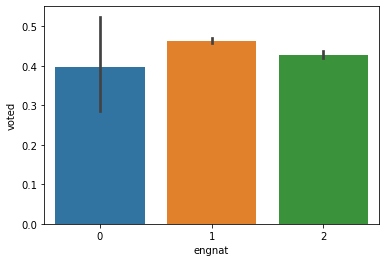

In [10]:
sns.barplot(x='engnat', y='voted', data=vote_df)

voted_prob(df=vote_df, column='engnat')

In [11]:
# 0의 비율이 상당히 낮으므로 삭제(0.0017)
eng_index = vote_df[vote_df['engnat'] == 0].index
eng_df = vote_df.drop(eng_index)
eng_df.shape

(36362, 78)

In [12]:
# 0칼럼이 정상적으로 삭제되었는지 확인
eng_df['engnat'].value_counts()

1    26364
2     9998
Name: engnat, dtype: int64

In [13]:
# 레이블 인코딩이 이미 되어있으므로 진행하지 않음
# engnat행 원핫 인코딩 진행
pd.get_dummies(eng_df['engnat'])

,1,2
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0
...,...,...
36420,1,0
36421,0,1
36422,1,0
36423,1,0


3. familysize 컬럼 전처리 

In [14]:
vote_df['familysize'].value_counts()

2      14321
3       9037
1       5261
4       3917
5       1521
0        983
6        662
7        313
8        175
9        102
10        48
11        29
12        16
13        10
14         7
15         7
44         3
17         3
16         2
20         2
21         2
999        1
34         1
18         1
30         1
Name: familysize, dtype: int64

투표한 사람들 중 2 비율: 0.3899
투표한 사람들 중 4 비율: 0.1158
투표한 사람들 중 3 비율: 0.2502
투표한 사람들 중 1 비율: 0.1339
투표한 사람들 중 7 비율: 0.0098
투표한 사람들 중 5 비율: 0.045
투표한 사람들 중 0 비율: 0.0248
투표한 사람들 중 9 비율: 0.0028
투표한 사람들 중 8 비율: 0.0048
투표한 사람들 중 6 비율: 0.0185
투표한 사람들 중 11 비율: 0.001
투표한 사람들 중 10 비율: 0.0016
투표한 사람들 중 14 비율: 0.0002
투표한 사람들 중 17 비율: 0.0002
투표한 사람들 중 21 비율: 0.0001
투표한 사람들 중 13 비율: 0.0004
투표한 사람들 중 12 비율: 0.0005
투표한 사람들 중 44 비율: 0.0001
투표한 사람들 중 30 비율: 0.0001
투표한 사람들 중 15 비율: 0.0002
투표한 사람들 중 16 비율: 0.0
투표한 사람들 중 18 비율: 0.0
투표한 사람들 중 34 비율: 0.0
투표한 사람들 중 20 비율: 0.0
투표한 사람들 중 999 비율: 0.0001

familysize 컬럼 중 2 의 비율: 0.3932
familysize 컬럼 중 4 의 비율: 0.1075
familysize 컬럼 중 3 의 비율: 0.2481
familysize 컬럼 중 1 의 비율: 0.1444
familysize 컬럼 중 7 의 비율: 0.0086
familysize 컬럼 중 5 의 비율: 0.0418
familysize 컬럼 중 0 의 비율: 0.027
familysize 컬럼 중 9 의 비율: 0.0028
familysize 컬럼 중 8 의 비율: 0.0048
familysize 컬럼 중 6 의 비율: 0.0182
familysize 컬럼 중 11 의 비율: 0.0008
familysize 컬럼 중 10 의 비율: 0.0013
familysize 컬럼 중 14 의 비율: 0.0002
familysize 컬럼 중 1

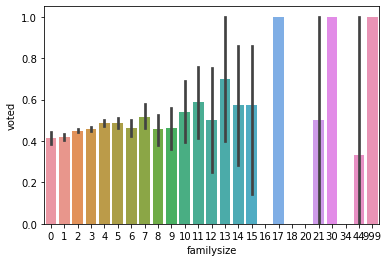

In [15]:
sns.barplot(x='familysize', y='voted', data=vote_df)

voted_prob(df=vote_df, column='familysize')

In [16]:
# 데이터 전처리를 위한 준비(서윤님거 참고)
mini_fs = pd.DataFrame(vote_df['familysize'])
mini_fs

,familysize
0,2
1,4
2,3
3,3
4,4
...,...
36420,6
36421,4
36422,6
36423,4


In [17]:
# 비율이 0.01 이하인 것을 삭제하기 위하 준비 - 라벨링 (함수를 모르겠어요 ㅜㅜ)
def fs_labeling(df):
    label_list=[]
    for i in range(len(df)):
        if df.iloc[i]['familysize']==[2]:
            label_list.append(7)
        elif df.iloc[i]['familysize']==[3]:
            label_list.append(6)
        elif df.iloc[i]['familysize']==[1]:
            label_list.append(5)
        elif df.iloc[i]['familysize']==[4]:
            label_list.append(4)
        elif df.iloc[i]['familysize']==[5]:
            label_list.append(3)
        elif df.iloc[i]['familysize']==[0]:
            label_list.append(2)
        elif df.iloc[i]['familysize']==[6]:
            label_list.append(1)
        else:
            label_list.append(0)
    return label_list

label_list = fs_labeling(mini_fs)

mini_fs['familysize_labeling'] = label_list
mini_fs

,familysize,familysize_labeling
0,2,7
1,4,4
2,3,6
3,3,6
4,4,4
...,...,...
36420,6,1
36421,4,4
36422,6,1
36423,4,4


In [18]:
# 라벨링 후 0인 컬럼을 삭제
zero_index = mini_fs[mini_fs['familysize_labeling'] == 0].index
mini_fs = mini_fs.drop(zero_index)
mini_fs.shape

(35702, 2)

In [19]:
# 0인 컬럼(비율이 0.01이하인 것)이 잘 삭제되었는지 확인
mini_fs['familysize'].value_counts()

2    14321
3     9037
1     5261
4     3917
5     1521
0      983
6      662
Name: familysize, dtype: int64

In [20]:
#원핫 인코딩
pd.get_dummies(mini_fs['familysize'])

,0,1,2,3,4,5,6
0,0,0,1,0,0,0,0
1,0,0,0,0,1,0,0
2,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0
4,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...
36420,0,0,0,0,0,0,1
36421,0,0,0,0,1,0,0
36422,0,0,0,0,0,0,1
36423,0,0,0,0,1,0,0
